Original data shape: (1000, 5)
       FBG1      FBG2      FBG3    Strain  Temperature
0  0.374540  0.950714  0.731994  7.367187     5.814632
1  0.598658  0.156019  0.155995  2.507046     1.877922
2  0.058084  0.866176  0.601115  5.788628     4.699857
3  0.708073  0.020584  0.969910  6.190852     5.000925
4  0.832443  0.212339  0.181825  3.332222     2.447430

Baseline Wavelengths:
FBG1 baseline: 0.511980 nm
FBG2 baseline: 0.494225 nm
FBG3 baseline: 0.493475 nm

Wavelength Shifts Statistics:
Delta_FBG1: min=-0.511845, max=0.487738
Delta_FBG2: min=-0.494213, max=0.504123
Delta_FBG3: min=-0.492121, max=0.503222

--- Model A: Strain Prediction using Δλ (FBG1 + FBG2) ---
Intercept (β0): 4.9789878877956
Coefficients (βi): [1.99824111 3.02601298]
R² Score: 0.3779988241716178
MSE: 2.1150117757876874

--- Model A: Temperature Prediction using Δλ (FBG1 + FBG2) ---
Intercept (β0): 3.975641051079897
Coefficients (βi): [1.50904207 2.53027618]
R² Score: 0.3752709347178689
MSE: 1.347263073020383

---

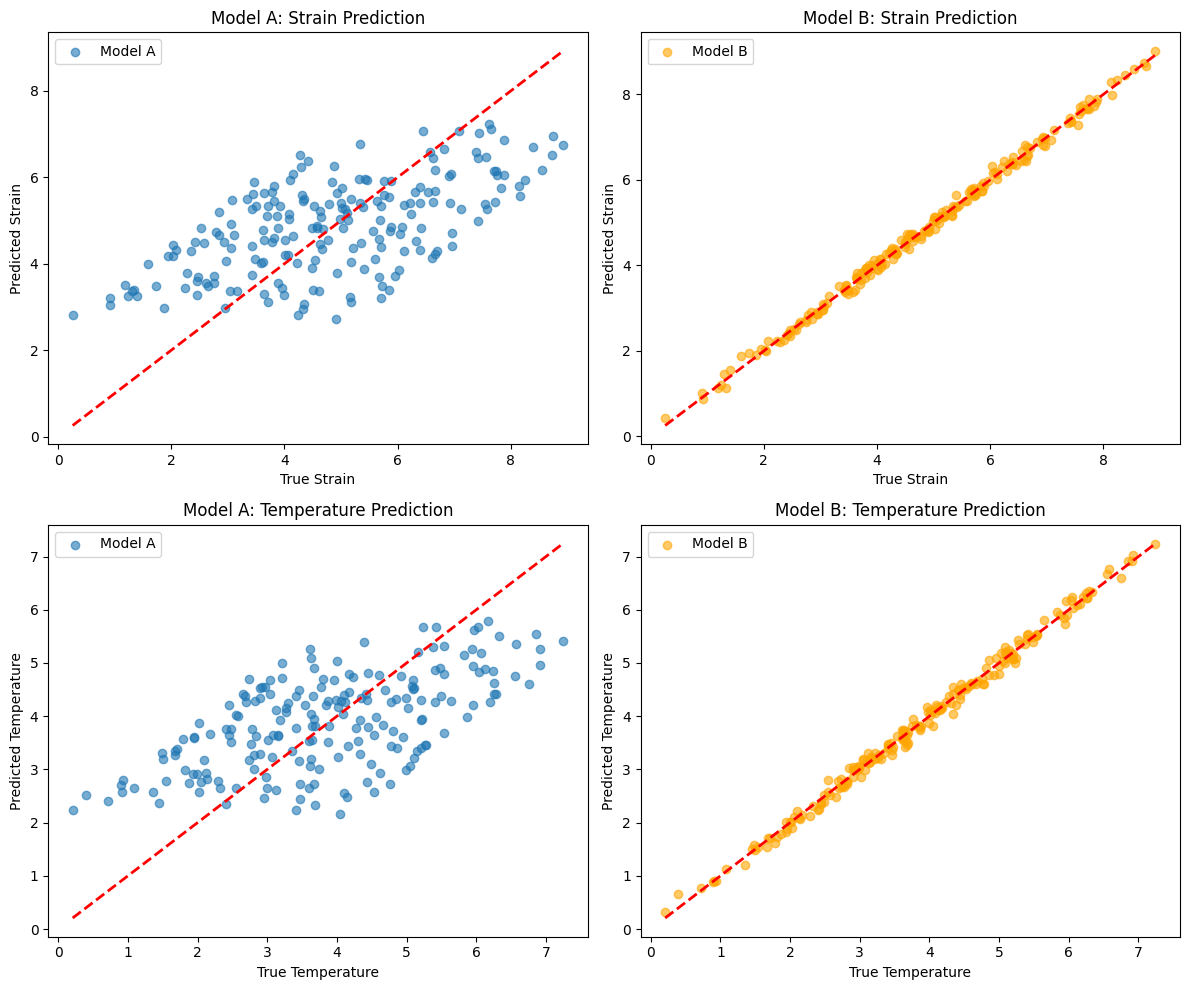

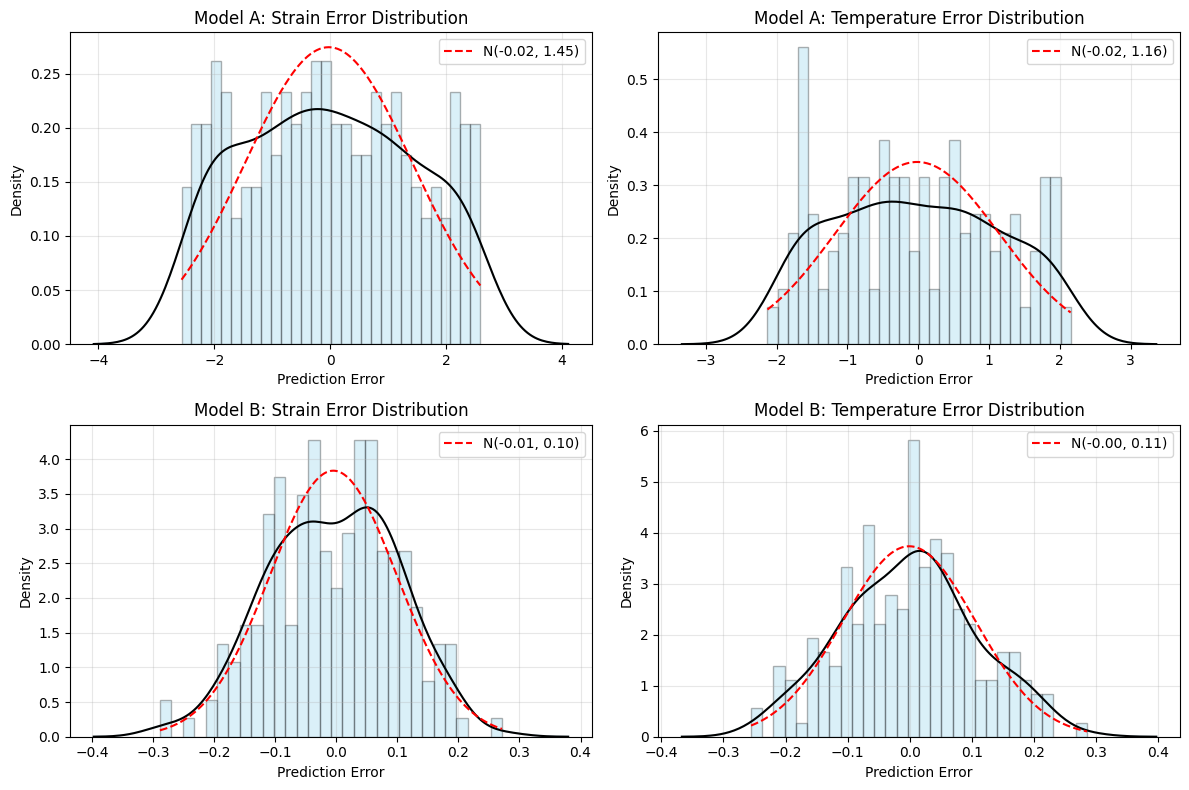


SUMMARY: Raw λ vs Δλ Models
Model A (Δλ) - Strain R²: 0.3780
Model A (Δλ) - Temperature R²: 0.3753
Model B (Δλ) - Strain R²: 0.9968
Model B (Δλ) - Temperature R²: 0.9947

Enhanced dataset saved with wavelength shifts: (1000, 8)


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load data
data = pd.read_csv("fbg_sensor_strain_temperature_data.csv")
print("Original data shape:", data.shape)
print(data.head())

# -------------------------------
# BASELINE WAVELENGTH CALCULATION
# -------------------------------

def calculate_baseline_wavelengths(data, method='mean'):
    """
    Calculate baseline (reference) wavelengths for each FBG sensor
    Methods: 'mean', 'median', 'first_n_samples'
    """
    if method == 'mean':
        baseline_fbg1 = data['FBG1'].mean()
        baseline_fbg2 = data['FBG2'].mean() 
        baseline_fbg3 = data['FBG3'].mean()
    elif method == 'median':
        baseline_fbg1 = data['FBG1'].median()
        baseline_fbg2 = data['FBG2'].median()
        baseline_fbg3 = data['FBG3'].median()
    elif method == 'first_n_samples':
        n = 50  # Use first 50 samples as baseline
        baseline_fbg1 = data['FBG1'].head(n).mean()
        baseline_fbg2 = data['FBG2'].head(n).mean()
        baseline_fbg3 = data['FBG3'].head(n).mean()
    
    return baseline_fbg1, baseline_fbg2, baseline_fbg3

# Calculate baseline wavelengths
baseline_fbg1, baseline_fbg2, baseline_fbg3 = calculate_baseline_wavelengths(data, method='mean')

print(f"\nBaseline Wavelengths:")
print(f"FBG1 baseline: {baseline_fbg1:.6f} nm")
print(f"FBG2 baseline: {baseline_fbg2:.6f} nm") 
print(f"FBG3 baseline: {baseline_fbg3:.6f} nm")

# -------------------------------
# CALCULATE WAVELENGTH SHIFTS (Δλ)
# -------------------------------

# Calculate wavelength shifts
data['Delta_FBG1'] = data['FBG1'] - baseline_fbg1
data['Delta_FBG2'] = data['FBG2'] - baseline_fbg2  
data['Delta_FBG3'] = data['FBG3'] - baseline_fbg3

print(f"\nWavelength Shifts Statistics:")
print(f"Delta_FBG1: min={data['Delta_FBG1'].min():.6f}, max={data['Delta_FBG1'].max():.6f}")
print(f"Delta_FBG2: min={data['Delta_FBG2'].min():.6f}, max={data['Delta_FBG2'].max():.6f}")
print(f"Delta_FBG3: min={data['Delta_FBG3'].min():.6f}, max={data['Delta_FBG3'].max():.6f}")

# -------------------------------
# MODEL A: Using Δλ shifts for Strain prediction
# -------------------------------
X_A = data[['Delta_FBG1', 'Delta_FBG2']]
y_strain = data['Strain']

X_train_A, X_test_A, y_train_strain, y_test_strain = train_test_split(
    X_A, y_strain, test_size=0.2, random_state=42
)

model_A_strain = LinearRegression()
model_A_strain.fit(X_train_A, y_train_strain)
y_pred_A_strain = model_A_strain.predict(X_test_A)

print("\n--- Model A: Strain Prediction using Δλ (FBG1 + FBG2) ---")
print("Intercept (β0):", model_A_strain.intercept_)
print("Coefficients (βi):", model_A_strain.coef_)
print("R² Score:", r2_score(y_test_strain, y_pred_A_strain))
print("MSE:", mean_squared_error(y_test_strain, y_pred_A_strain))

# -------------------------------
# MODEL A: Using Δλ shifts for Temperature prediction  
# -------------------------------
y_temp = data['Temperature']
X_train_A, X_test_A, y_train_temp, y_test_temp = train_test_split(
    X_A, y_temp, test_size=0.2, random_state=42
)

model_A_temp = LinearRegression()
model_A_temp.fit(X_train_A, y_train_temp)
y_pred_A_temp = model_A_temp.predict(X_test_A)

print("\n--- Model A: Temperature Prediction using Δλ (FBG1 + FBG2) ---")
print("Intercept (β0):", model_A_temp.intercept_)
print("Coefficients (βi):", model_A_temp.coef_)
print("R² Score:", r2_score(y_test_temp, y_pred_A_temp))
print("MSE:", mean_squared_error(y_test_temp, y_pred_A_temp))

# -------------------------------
# MODEL B: Using all three Δλ shifts for Strain prediction
# -------------------------------
X_B = data[['Delta_FBG1', 'Delta_FBG2', 'Delta_FBG3']]

X_train_B, X_test_B, y_train_strain, y_test_strain = train_test_split(
    X_B, y_strain, test_size=0.2, random_state=42
)

model_B_strain = LinearRegression()
model_B_strain.fit(X_train_B, y_train_strain)
y_pred_B_strain = model_B_strain.predict(X_test_B)

print("\n--- Model B: Strain Prediction using Δλ (FBG1 + FBG2 + FBG3) ---")
print("Intercept (β0):", model_B_strain.intercept_)
print("Coefficients (βi):", model_B_strain.coef_)
print("R² Score:", r2_score(y_test_strain, y_pred_B_strain))
print("MSE:", mean_squared_error(y_test_strain, y_pred_B_strain))

# -------------------------------
# MODEL B: Using all three Δλ shifts for Temperature prediction
# -------------------------------
X_train_B, X_test_B, y_train_temp, y_test_temp = train_test_split(
    X_B, y_temp, test_size=0.2, random_state=42
)

model_B_temp = LinearRegression()
model_B_temp.fit(X_train_B, y_train_temp)
y_pred_B_temp = model_B_temp.predict(X_test_B)

print("\n--- Model B: Temperature Prediction using Δλ (FBG1 + FBG2 + FBG3) ---")
print("Intercept (β0):", model_B_temp.intercept_)
print("Coefficients (βi):", model_B_temp.coef_)
print("R² Score:", r2_score(y_test_temp, y_pred_B_temp))
print("MSE:", mean_squared_error(y_test_temp, y_pred_B_temp))

# -------------------------------
# VISUALIZATION
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Strain predictions - Model A vs Model B
axes[0,0].scatter(y_test_strain, y_pred_A_strain, alpha=0.6, label='Model A')
axes[0,0].plot([y_test_strain.min(), y_test_strain.max()], 
               [y_test_strain.min(), y_test_strain.max()], 'r--', lw=2)
axes[0,0].set_xlabel('True Strain')
axes[0,0].set_ylabel('Predicted Strain')
axes[0,0].set_title('Model A: Strain Prediction')
axes[0,0].legend()

axes[0,1].scatter(y_test_strain, y_pred_B_strain, alpha=0.6, label='Model B', color='orange')
axes[0,1].plot([y_test_strain.min(), y_test_strain.max()], 
               [y_test_strain.min(), y_test_strain.max()], 'r--', lw=2)
axes[0,1].set_xlabel('True Strain')
axes[0,1].set_ylabel('Predicted Strain')
axes[0,1].set_title('Model B: Strain Prediction')
axes[0,1].legend()

# Temperature predictions - Model A vs Model B
axes[1,0].scatter(y_test_temp, y_pred_A_temp, alpha=0.6, label='Model A')
axes[1,0].plot([y_test_temp.min(), y_test_temp.max()], 
               [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
axes[1,0].set_xlabel('True Temperature')
axes[1,0].set_ylabel('Predicted Temperature')
axes[1,0].set_title('Model A: Temperature Prediction')
axes[1,0].legend()

axes[1,1].scatter(y_test_temp, y_pred_B_temp, alpha=0.6, label='Model B', color='orange')
axes[1,1].plot([y_test_temp.min(), y_test_temp.max()], 
               [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
axes[1,1].set_xlabel('True Temperature')
axes[1,1].set_ylabel('Predicted Temperature')
axes[1,1].set_title('Model B: Temperature Prediction')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# -------------------------------
# ERROR ANALYSIS WITH Δλ
# -------------------------------
# Calculate prediction errors
error_A_strain = y_test_strain - y_pred_A_strain
error_A_temp = y_test_temp - y_pred_A_temp
error_B_strain = y_test_strain - y_pred_B_strain  
error_B_temp = y_test_temp - y_pred_B_temp

# Plot error distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

def plot_distribution(ax, data, title):
    # Histogram
    ax.hist(data, bins=30, density=True, alpha=0.3, color="skyblue", edgecolor="black")

    # KDE (filled + line)
    sns.kdeplot(data, ax=ax, fill=False, color="skyblue", alpha=0.3, linewidth=1.5)
    sns.kdeplot(data, ax=ax, color="black", linewidth=1.5)

    # Normal distribution fit
    mu, std = norm.fit(data)
    x = np.linspace(min(data), max(data), 200)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r--', linewidth=1.5, label=f'N({mu:.2f}, {std:.2f})')

    # Formatting
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Prediction Error")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(alpha=0.3)

# Example usage (replace error_* with your arrays)
plot_distribution(axes[0,0], error_A_strain, "Model A: Strain Error Distribution")
plot_distribution(axes[0,1], error_A_temp, "Model A: Temperature Error Distribution")
plot_distribution(axes[1,0], error_B_strain, "Model B: Strain Error Distribution")
plot_distribution(axes[1,1], error_B_temp, "Model B: Temperature Error Distribution")

plt.tight_layout()
plt.show()

# -------------------------------
# SUMMARY COMPARISON
# -------------------------------
print("\n" + "="*60)
print("SUMMARY: Raw λ vs Δλ Models")
print("="*60)
print(f"Model A (Δλ) - Strain R²: {r2_score(y_test_strain, y_pred_A_strain):.4f}")
print(f"Model A (Δλ) - Temperature R²: {r2_score(y_test_temp, y_pred_A_temp):.4f}")
print(f"Model B (Δλ) - Strain R²: {r2_score(y_test_strain, y_pred_B_strain):.4f}") 
print(f"Model B (Δλ) - Temperature R²: {r2_score(y_test_temp, y_pred_B_temp):.4f}")

# Save the enhanced dataset with wavelength shifts
data.to_csv("fbg_sensor_data_with_shifts.csv", index=False)
print(f"\nEnhanced dataset saved with wavelength shifts: {data.shape}")